# 聚类模型构建

## 数据处理 

### 准备工作

In [1]:
# Import necessary libraries

# 聚类算法
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, OPTICS, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns
tsne_df = pd.read_csv('data/tsne_df.csv')
print("数据已加载")

# 提取特征（x, y坐标）进行聚类
X = tsne_df[['x', 'y']].values

# 获取真实标签用于后续评估
true_labels = tsne_df['label'].values

数据已加载


## 聚类模型构建

In [2]:
# 应用K-means聚类，设置k=10（对应10个数字）
kmeans = KMeans(n_clusters=10, 
                random_state=42, 
                n_init = 100, 
                max_iter = 1000,
                init = 'k-means++')
kmeans_cluster_labels = kmeans.fit_predict(X)
print("K-means聚类完成")

K-means聚类完成


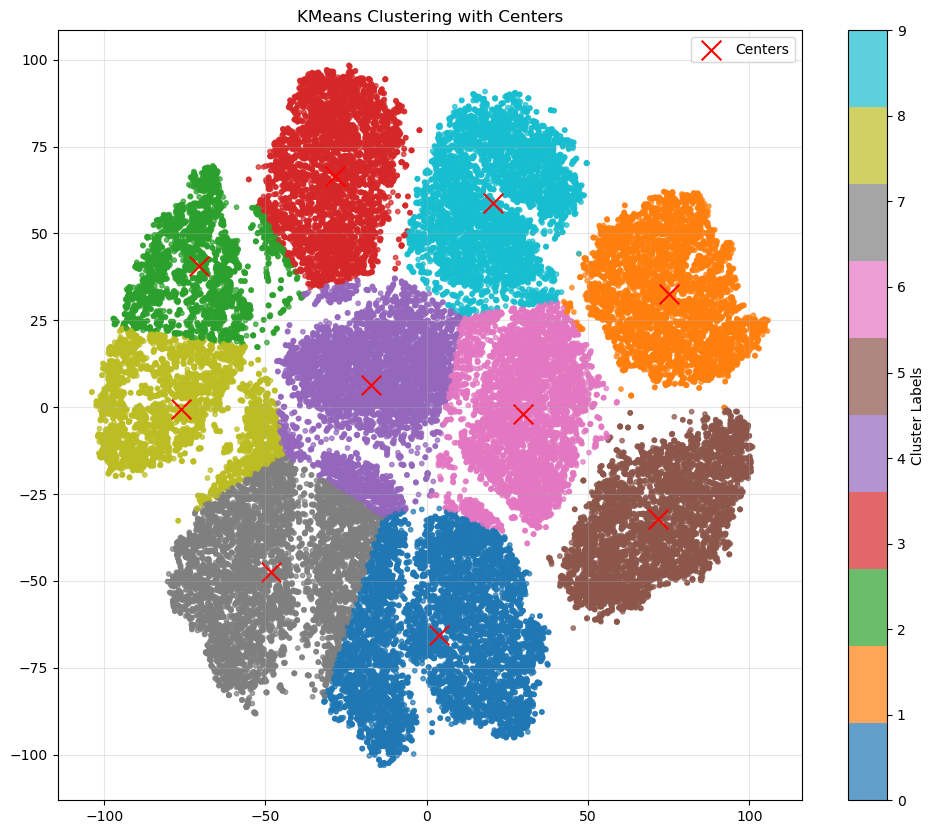

In [3]:
import matplotlib.pyplot as plt

# 绘制KMeans聚类结果
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans_cluster_labels, cmap='tab10', alpha=0.7, s=10)

# 标出KMeans的中心点
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')

plt.title('KMeans Clustering with Centers')
plt.colorbar(scatter, label='Cluster Labels')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('picture/kmeans_clustering_with_centers.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [5]:
# 应用高斯混合模型GMM
gmm = GaussianMixture(n_components=10, random_state=42, max_iter=10000, n_init=100)
gmm_labels = gmm.fit_predict(X)
print("高斯混合模型GMM聚类完成")

高斯混合模型GMM聚类完成


In [ ]:
# 应用层次聚类
agglo = AgglomerativeClustering(n_clusters=10, linkage='average')
agglo_labels = agglo.fit_predict(X)
print("层次聚类完成")

层次聚类完成


In [ ]:
# 对数据进行L2规范化（每个样本的向量长度为1）
X_normalized = normalize(X, norm='l2')

# 应用标准K-means（使用欧氏距离）
kmeans_cosine = KMeans(n_clusters=10, 
                      random_state=42,
                      n_init=100,
                      max_iter=1000)
cosine_labels = kmeans_cosine.fit_predict(X_normalized)
print("基于余弦相似度的K-means聚类完成")

基于余弦相似度的K-means聚类完成


In [ ]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=10, 
                      batch_size=50000, 
                      random_state=42,
                      n_init="auto")
mbk_labels = mbk.fit_predict(X)
print("Mini-Batch K-means聚类完成")

Mini-Batch K-means聚类完成
KMeans: 
	Adjusted Rand Index (ARI): 0.7017
	Silhouette Score: 0.4134


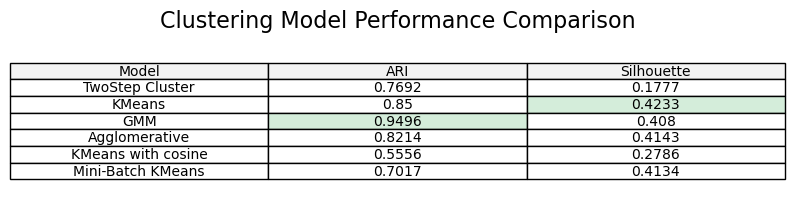

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 创建DataFrame
data = {
    "Model": ["TwoStep Cluster​", "KMeans", "GMM", "Agglomerative", "KMeans with cosine", "Mini-Batch KMeans"],
    "ARI": [0.7692, 0.8500, 0.9496, 0.8214, 0.5556, 0.7017],
    "Silhouette": [0.1777, 0.4233, 0.4080, 0.4143, 0.2786, 0.4134]
}
df = pd.DataFrame(data)

# 绘制表格
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# 表格样式
table = plt.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f3f3f3']*3)

# 高亮最优值
table[(3, 1)].set_facecolor("#d4edda")  # GMM的ARI最高
table[(2, 2)].set_facecolor("#d4edda")  # KMeans的Silhouette最高

plt.title("Clustering Model Performance Comparison", pad=12, fontsize=16)
plt.savefig('picture/clustering_table.png', dpi=300, bbox_inches='tight')
plt.show()

## 聚类评估

In [ ]:
# 评估聚类性能

# 兰德指数 (ARI)， 用于评估聚类结果与真实标签之间的一致性
# ARI范围在[-1, 1]之间，越接近1表示聚类效果越好
# 轮廓系数 (Silhouette Score)， 用于评估聚类的紧密度和分离度
# 轮廓系数范围在[-1, 1]之间，越接近1表示聚类效果越好

print("KMeans: ")
kmeans_ari = adjusted_rand_score(true_labels, kmeans_cluster_labels)
kmeans_silhouette = silhouette_score(X, kmeans_cluster_labels)
print(f"\tAdjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"\tSilhouette Score: {kmeans_silhouette:.4f}")

print("Gaussian Mixture Model (GMM): ")
gmm_ari = adjusted_rand_score(true_labels, gmm_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)
print(f"\tAdjusted Rand Index (ARI): {gmm_ari:.4f}")
print(f"\tSilhouette Score: {gmm_silhouette:.4f}")

print("Agglomerative Clustering: ")
agglo_ari = adjusted_rand_score(true_labels, agglo_labels)
agglo_silhouette = silhouette_score(X, agglo_labels)
print(f"\tAdjusted Rand Index (ARI): {agglo_ari:.4f}")
print(f"\tSilhouette Score: {agglo_silhouette:.4f}")

print("KMeans: ")
cosine_kmeans_ari = adjusted_rand_score(true_labels, cosine_labels)
cosine_kmeans_silhouette = silhouette_score(X, cosine_labels)
print(f"\tAdjusted Rand Index (ARI): {cosine_kmeans_ari:.4f}")
print(f"\tSilhouette Score: {cosine_kmeans_silhouette:.4f}")

print("Mini-Batch  KMeans: ")
mbk_ari = adjusted_rand_score(true_labels, mbk_labels)
mbk_silhouette = silhouette_score(X, mbk_labels)
print(f"\tAdjusted Rand Index (ARI): {mbk_ari:.4f}")
print(f"\tSilhouette Score: {mbk_silhouette:.4f}")

KMeans: 
	Adjusted Rand Index (ARI): 0.7096
	Silhouette Score: 0.4196
Gaussian Mixture Model (GMM): 
	Adjusted Rand Index (ARI): 0.8933
	Silhouette Score: 0.4080
Agglomerative Clustering: 
	Adjusted Rand Index (ARI): 0.8214
	Silhouette Score: 0.4143
KMeans: 
	Adjusted Rand Index (ARI): 0.5556
	Silhouette Score: 0.2786


# 聚类效果可视化

## 初始混淆矩阵

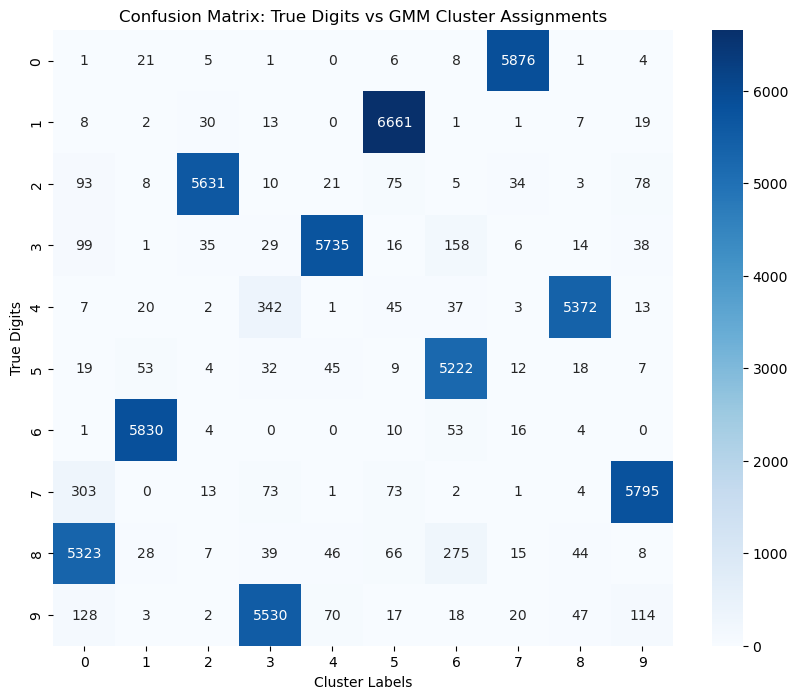

In [6]:
import matplotlib.pyplot as plt
# Create confusion matrix to analyze clustering quality
conf_mat = np.zeros((10, 10), dtype=int)
for i in range(len(true_labels)):
    true_label = int(true_labels[i])  # 确保索引为整数
    cluster = gmm_labels[i]
    conf_mat[true_label, cluster] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster Labels')
plt.ylabel('True Digits')
plt.title('Confusion Matrix: True Digits vs GMM Cluster Assignments')
plt.savefig('picture/gmm_confusion_matrix.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [ ]:
# 创建聚类标签到实际数字的映射
cluster_to_digit_map = {}

# 使用之前计算的混淆矩阵确定最佳映射
for cluster_id in range(10):
    # 找出该聚类中数量最多的真实数字
    digit = np.argmax(conf_mat[:, cluster_id])
    cluster_to_digit_map[cluster_id] = digit

# 应用映射，创建新的标签
mapped_labels = np.array([cluster_to_digit_map[label] for label in gmm_labels])

# 检查映射后的准确率
accuracy = np.mean(mapped_labels == true_labels)
print(f"映射后的准确率: {accuracy:.4f}")

# 显示映射关系
print("聚类标签到数字的映射关系:")
for cluster, digit in cluster_to_digit_map.items():
    print(f"聚类 {cluster} -> 数字 {digit}")

映射后的准确率: 0.9496
聚类标签到数字的映射关系:
聚类 0 -> 数字 8
聚类 1 -> 数字 6
聚类 2 -> 数字 2
聚类 3 -> 数字 9
聚类 4 -> 数字 3
聚类 5 -> 数字 1
聚类 6 -> 数字 5
聚类 7 -> 数字 0
聚类 8 -> 数字 4
聚类 9 -> 数字 7


## 修正后的混淆矩阵

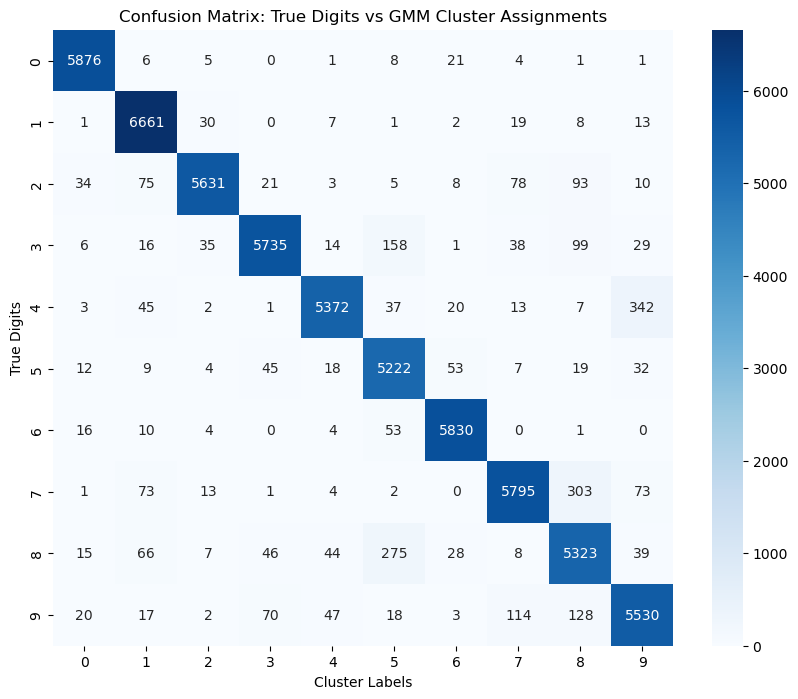

In [ ]:
conf_mat = np.zeros((10, 10), dtype=int)
for i in range(len(true_labels)):
    true_label = int(true_labels[i])  # 确保索引为整数
    cluster = mapped_labels[i]
    conf_mat[true_label, cluster] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster Labels')
plt.ylabel('True Digits')
plt.title('Confusion Matrix: True Digits vs GMM Cluster Assignments')
plt.savefig('picture/gmm_confusion_matrix.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

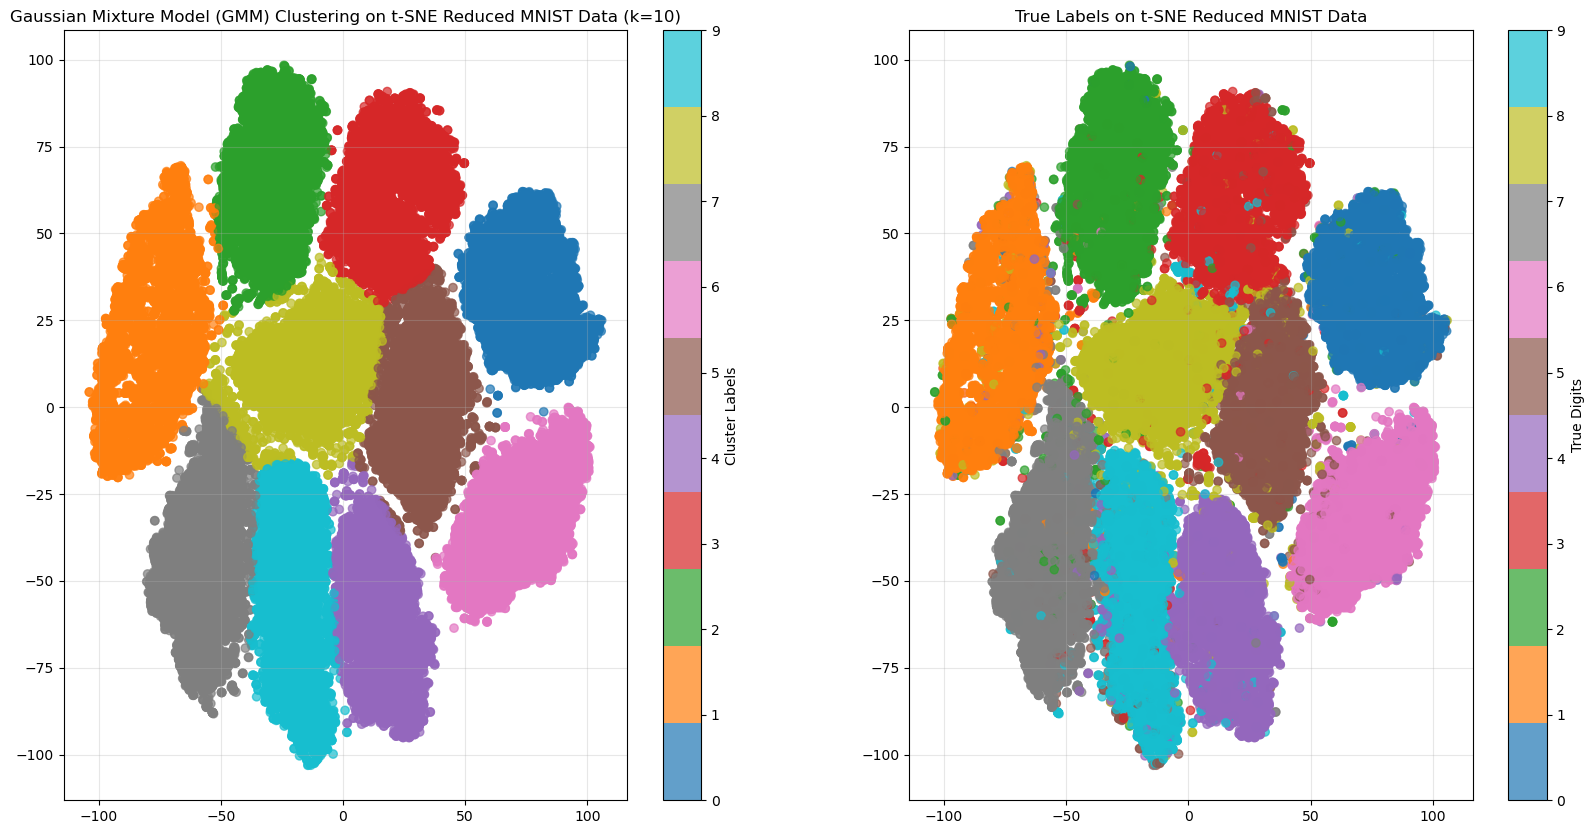

In [ ]:
# Visualize clustering results and true labels in one figure
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot GMM clustering
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap='tab10', alpha=0.7)
axes[0].set_title('Gaussian Mixture Model (GMM) Clustering on t-SNE Reduced MNIST Data (k=10)')
axes[0].grid(True, alpha=0.3)
cbar1 = fig.colorbar(scatter1, ax=axes[0], label='Cluster Labels')

# Plot true labels
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='tab10', alpha=0.7)
axes[1].set_title('True Labels on t-SNE Reduced MNIST Data')
axes[1].grid(True, alpha=0.3)
cbar2 = fig.colorbar(scatter2, ax=axes[1], label='True Digits')

# Save the combined figure
plt.savefig('picture/combined_clustering_and_true_labels.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pickle

# 保存 mapped_labels 到文件
with open('data/clustered_data/mapped_labels.pkl', 'wb') as f:
    pickle.dump(mapped_labels, f)

print("mapped_labels 已保存到 mapped_labels.pkl 文件中")

mapped_labels 已保存到 mapped_labels.pkl 文件中


In [11]:
import pickle
with open('data/clustered_data/mapped_labels.pkl', 'rb') as f:
    mapped_labels = pickle.load(f)

新数据点: [26.4107399  68.84806061]
最近的训练点: [26.4107399  68.84806061]
该点的标签: 3
距离: 0.0000


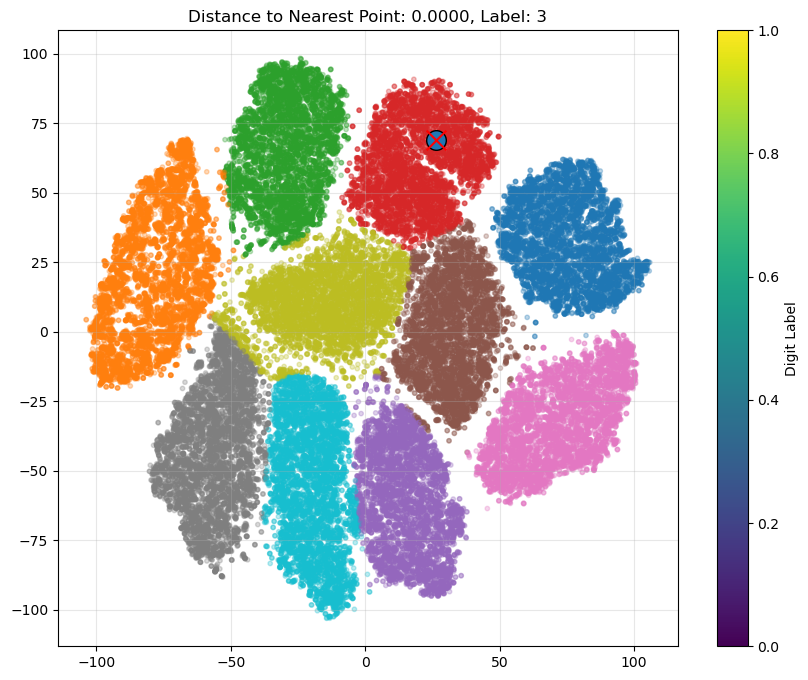

In [12]:
from find_nearest_point import find_nearest_point
# 新数据点
new_point = np.array([[26.4107399 , 68.84806061]])

# 使用我们创建的函数
nearest_point, nearest_label, distance = find_nearest_point(new_point, X, mapped_labels)

print(f"新数据点: {new_point[0]}")
print(f"最近的训练点: {nearest_point}")
print(f"该点的标签: {nearest_label}")
print(f"距离: {distance:.4f}")

# 可视化结果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap='tab10', alpha=0.3, s=10)
plt.scatter(nearest_point[0], nearest_point[1], c=nearest_label, cmap='tab10', s=200, edgecolors='black')
plt.scatter(new_point[0, 0], new_point[0, 1], c='red', marker='x', s=200)

# 绘制连接线
plt.plot([new_point[0, 0], nearest_point[0]], [new_point[0, 1], nearest_point[1]], 'k--')

plt.title(f'Distance to Nearest Point: {distance:.4f}, Label: {nearest_label}')
plt.colorbar(label='Digit Label')
plt.grid(True, alpha=0.3)
plt.show()

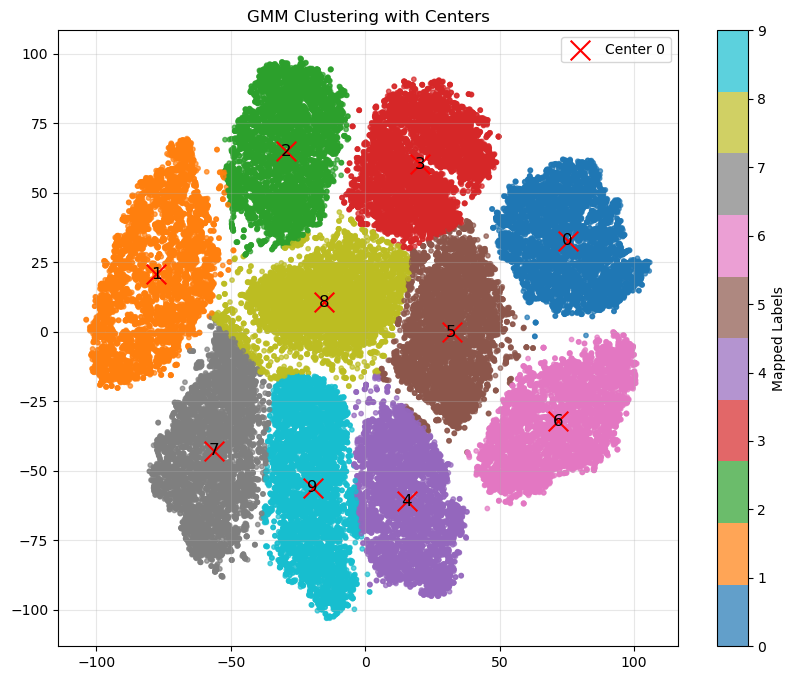

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap='tab10', alpha=0.7, s=10)

# 标注聚类中心
for cluster_id, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c='red', marker='x', s=200, label=f'Center {cluster_id}' if cluster_id == 0 else "")
    plt.text(center[0], center[1], f'{cluster_id}', color='black', fontsize=12, ha='center', va='center')

plt.title('GMM Clustering with Centers')
plt.colorbar(scatter, label='Mapped Labels')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=10)
plt.savefig('picture/GMM_Clustering_with_Centers.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()